In [86]:
path = "/content/drive/MyDrive/Garment workers/garments_worker_productivity.csv"

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
#pdSeries1=pd.Series(data = (43,17,-6), index = [7,9,3,2])
#print (Series1)

In [88]:
data = pd.read_csv('/content/garments_worker_productivity (1).csv')

In [89]:
data.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [90]:
data['wip'] = data['wip'].fillna(data['wip'].mean())
data.isna().sum()


date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [91]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [92]:
data = data.rename(columns={'team':'team_number', 'smv': 'time_allocated', 'wip': 'unfinished_items', 'no_of_style_change': 'style_change'})
data

,date,quarter,department,day,team_number,targeted_productivity,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [93]:
data['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [94]:
data['quarter'] = data['quarter'].str.replace('Quarter5', 'Quarter1')
data

,date,quarter,department,day,team_number,targeted_productivity,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [95]:
data.department = data.department.str.replace('sweing', 'sewing')
data.department = data.department.str.replace('finishing ', 'finishing')

In [96]:
data

,date,quarter,department,day,team_number,targeted_productivity,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team_number            1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   time_allocated         1197 non-null   float64
 7   unfinished_items       1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  style_change           1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [98]:
data.time_allocated = data.time_allocated.astype(int)
data

,date,quarter,department,day,team_number,targeted_productivity,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [99]:
data.targeted_productivity = data.targeted_productivity.astype(int)
data.unfinished_items = data.unfinished_items.astype(int)
data.idle_time = data.idle_time.astype(int)
data.no_of_workers = data.no_of_workers.astype(int)
data.quarter = data.quarter.str.extract(r'(\d+)')
data.drop(['date', 'targeted_productivity'], axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   quarter              1197 non-null   object 
 1   department           1197 non-null   object 
 2   day                  1197 non-null   object 
 3   team_number          1197 non-null   int64  
 4   time_allocated       1197 non-null   int64  
 5   unfinished_items     1197 non-null   int64  
 6   over_time            1197 non-null   int64  
 7   incentive            1197 non-null   int64  
 8   idle_time            1197 non-null   int64  
 9   idle_men             1197 non-null   int64  
 10  style_change         1197 non-null   int64  
 11  no_of_workers        1197 non-null   int64  
 12  actual_productivity  1197 non-null   float64
dtypes: float64(1), int64(9), object(3)
memory usage: 121.7+ KB


In [100]:
data

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,1,sewing,Thursday,8,26,1108,7080,98,0,0,0,59,0.940725
1,1,finishing,Thursday,1,3,1190,960,0,0,0,0,8,0.886500
2,1,sewing,Thursday,11,11,968,3660,50,0,0,0,30,0.800570
3,1,sewing,Thursday,12,11,968,3660,50,0,0,0,30,0.800570
4,1,sewing,Thursday,6,25,1170,1920,50,0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,finishing,Wednesday,10,2,1190,960,0,0,0,0,8,0.628333
1193,2,finishing,Wednesday,8,3,1190,960,0,0,0,0,8,0.625625
1194,2,finishing,Wednesday,7,3,1190,960,0,0,0,0,8,0.625625
1195,2,finishing,Wednesday,9,2,1190,1800,0,0,0,0,15,0.505889


In [101]:
lc = LabelEncoder()
print('Before encoding: ', data.department.unique())
data.department = lc.fit_transform(data.department)
print('After encoding: ', data.department.unique())

Before encoding:  ['sewing' 'finishing']
After encoding:  [1 0]


In [102]:
print('Before encoding: ', data.day.unique())
data.day = lc.fit_transform(data.day)
print('After encoding: ', data.day.unique())


Before encoding:  ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
After encoding:  [3 1 2 0 4 5]


In [103]:
data

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,1,1,3,8,26,1108,7080,98,0,0,0,59,0.940725
1,1,0,3,1,3,1190,960,0,0,0,0,8,0.886500
2,1,1,3,11,11,968,3660,50,0,0,0,30,0.800570
3,1,1,3,12,11,968,3660,50,0,0,0,30,0.800570
4,1,1,3,6,25,1170,1920,50,0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,0,5,10,2,1190,960,0,0,0,0,8,0.628333
1193,2,0,5,8,3,1190,960,0,0,0,0,8,0.625625
1194,2,0,5,7,3,1190,960,0,0,0,0,8,0.625625
1195,2,0,5,9,2,1190,1800,0,0,0,0,15,0.505889


In [104]:
data.quarter = data.quarter.str.extract(r'(\d+)')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   quarter              1197 non-null   object 
 1   department           1197 non-null   int64  
 2   day                  1197 non-null   int64  
 3   team_number          1197 non-null   int64  
 4   time_allocated       1197 non-null   int64  
 5   unfinished_items     1197 non-null   int64  
 6   over_time            1197 non-null   int64  
 7   incentive            1197 non-null   int64  
 8   idle_time            1197 non-null   int64  
 9   idle_men             1197 non-null   int64  
 10  style_change         1197 non-null   int64  
 11  no_of_workers        1197 non-null   int64  
 12  actual_productivity  1197 non-null   float64
dtypes: float64(1), int64(11), object(1)
memory usage: 121.7+ KB


In [106]:
data.describe(include='all')

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.577277,2.534670,6.426901,14.508772,1190.269006,4567.460317,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,NaN,0.494199,1.714538,3.463963,11.067638,1395.647280,3348.823563,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,NaN,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,0.000000,1.000000,3.000000,3.000000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,1.000000,3.000000,6.000000,15.000000,1190.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,1.000000,4.000000,9.000000,24.000000,1190.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


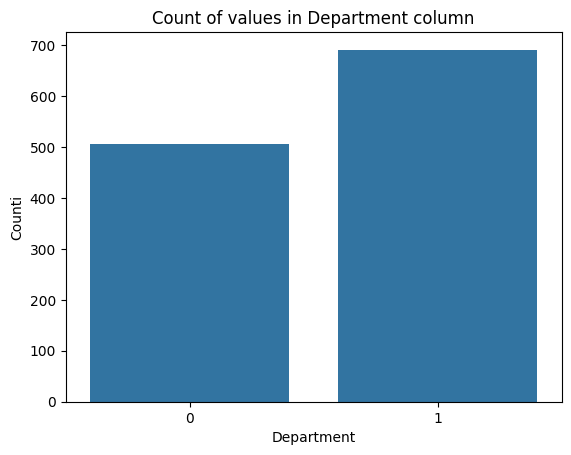

In [107]:
sns.countplot(data=data,x='department')
plt.xlabel('Department')
plt.ylabel('Counti')
plt.title('Count of values in Department column')
plt.show()

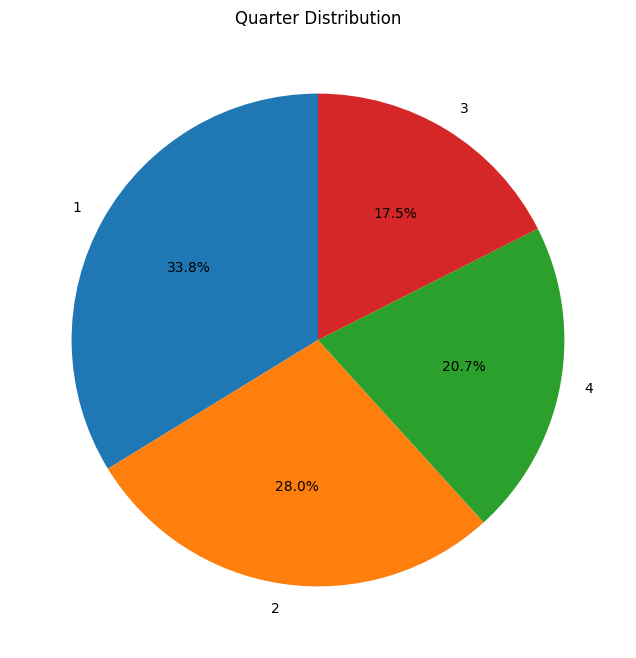

In [108]:
quarter_cnt = data.quarter.value_counts()
plt.figure(figsize=(10,8))
plt.pie(quarter_cnt, labels=quarter_cnt.index,autopct='%1.1f%%',startangle = 90)
plt.title('Quarter Distribution')
plt.show()

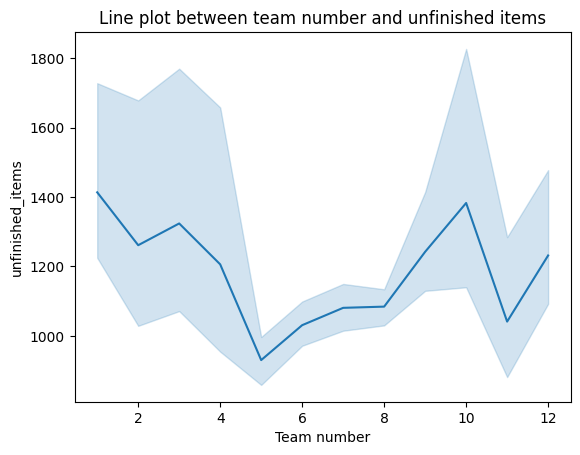

In [109]:
sns.lineplot(data=data, x='team_number', y='unfinished_items')
plt.xlabel('Team number')
plt.ylabel('unfinished_items')
plt.title('Line plot between team number and unfinished items')
plt.show()

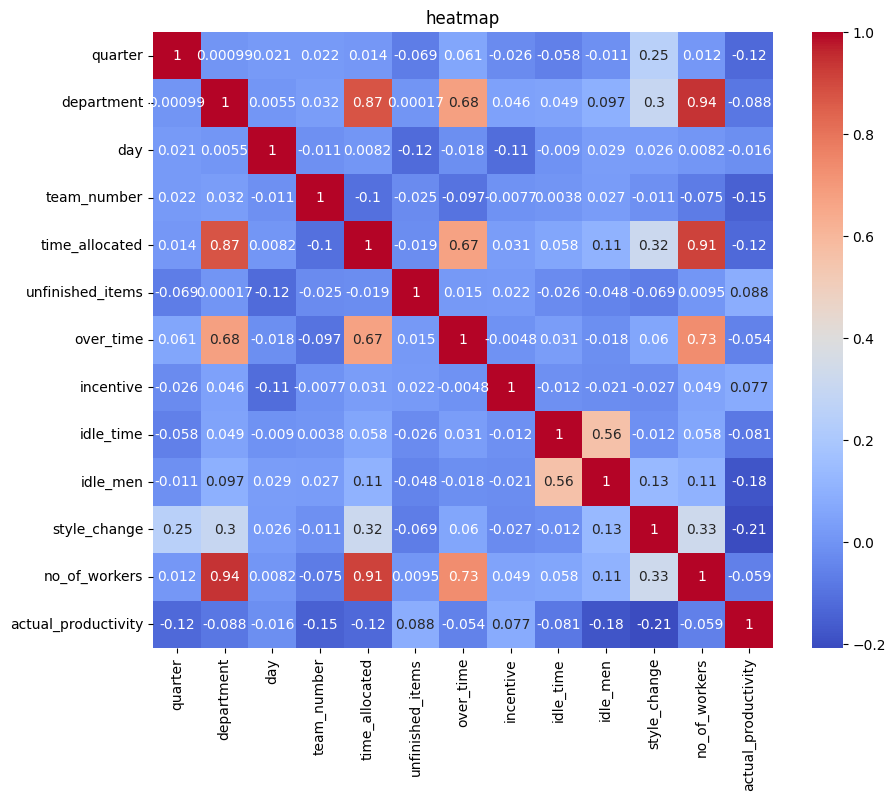

In [110]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')
plt.title('heatmap')
plt.show()

In [111]:
data.quarter = data.quarter.astype(int)

In [112]:
#data.drop(['date','targeted_productivity'], axis=1,inplace=True)

X = data.drop(['actual_productivity'], axis=1)



In [113]:
y = data.actual_productivity


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=25)
print(X_train.shape)

(957, 12)


In [115]:
sc = StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
dtr = DecisionTreeRegressor(max_depth=4,min_samples_split=3,min_samples_leaf=2)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=3)

In [118]:
rfr=RandomForestRegressor(n_estimators=100, max_depth=6,min_weight_fraction_leaf=0.05,max_features=0.8,random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, max_features=0.8,
                      min_weight_fraction_leaf=0.05, random_state=42)

In [119]:
gbr = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [120]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05,max_leaves=3,random_state=1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [121]:
base_model = XGBRegressor(n_estimators=700, learning_rate=0.06,max_depth=2,max_leaves=3,random_state=1)
bagging_reg = BaggingRegressor(base_model,n_estimators=100,random_state=42)
bagging_reg.fit(X_train, y_train)

BaggingRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.06, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=2,
                                        max_leaves=3, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=700,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=1, ...),
                 n_estimators=100, random_state=42)

In [122]:
base_model = XGBRegressor(n_estimators=700, learning_rate=0.06,max_depth=2,max_leaves=3,random_state=1)
boosting_reg = AdaBoostRegressor(base_model,n_estimators=100,learning_rate=0.1,random_state=42)
boosting_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None, device=None,
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, feature_types=None,
                                         gamma=None, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate=0.06, max_bin=None,
                                         max_cat_threshold=None,
                                         max_cat_to_onehot=None,
                                         max_delta_step=None, max_depth=2,
                                         max_leaves=3, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         multi_strategy=None, n_estimators=700,
                                         n_jobs=None, num_parallel_tree=None,
                                         random_state=1, ...),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [123]:
predict_lr = lr.predict(X_train)
mse = mean_squared_error(y_train, predict_lr)
rmse_lr_train = np.sqrt(mse)
rmse_lr_train

0.16226529653729893

In [124]:
predict_lr_test = lr.predict(X_test)
mse = mean_squared_error(y_test, predict_lr_test)
rmse_lr_train = np.sqrt(mse)
rmse_lr_train

0.16116562949494248